In [1]:
# Importing Necessary Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# DataSet Read in JSON format

In [3]:
df = pd.read_json('/kaggle/input/hugging-face-models/data.json')
df

,model_id,pipeline,downloads,likes,author_id,author_name,author_type,author_isPro,lastModified
0,jonatasgrosman/wav2vec2-large-xlsr-53-english,automatic-speech-recognition,72409331,316,jonatasgrosman,Jonatas Grosman,user,False,2023-03-25 10:56:55
1,bert-base-uncased,fill-mask,56077139,1214,None,None,None,False,2023-06-30 01:42:19
2,distilbert-base-uncased-finetuned-sst-2-english,text-classification,37421074,351,None,None,None,False,2023-10-26 16:14:11
3,openai/clip-vit-large-patch14,zero-shot-image-classification,32173869,723,openai,OpenAI,org,False,2023-09-15 15:49:35
4,timm/mobilenetv3_large_100.ra_in1k,image-classification,24075216,16,timm,PyTorch Image Models,org,False,2023-04-27 22:49:21
...,...,...,...,...,...,...,...,...,...
412502,dddream/disney-pixar,None,0,0,dddream,star,user,False,2023-11-27 02:55:33
412503,Santp98/SBERT-pairs-paraphrase-MiniLM-L6-v2,sentence-similarity,0,0,Santp98,santiago prado,user,False,2023-11-27 02:51:10
412504,qeternity/Nous-Hermes-13b-6bpw-exl2,None,0,0,qeternity,qeternity,user,False,2023-11-27 02:55:46
412505,Apurva3509/EECS6893,None,0,0,Apurva3509,Apurva Patel,user,False,2023-11-27 02:56:32


# Dropping Unwanted Duplicate DataFrames

In [4]:
df.drop_duplicates(inplace=True)
df.shape

(412507, 9)

# Showing Uniques dataset values for modelID

In [5]:
unique_values_list = df['model_id'].unique().tolist()
u_shape = len(unique_values_list)
u_shape

412507

> **Observation: There were No duplicate Models in the DataSet**

# Checking NULL Values 

In [6]:
author_id_df = df['author_id']
author_id_df

0         jonatasgrosman
1                   None
2                   None
3                 openai
4                   timm
               ...      
412502           dddream
412503           Santp98
412504         qeternity
412505        Apurva3509
412506           neel26d
Name: author_id, Length: 412507, dtype: object

In [7]:
null_author_id_count= author_id_df.isnull().sum()
null_author_id_count

67

> **67 Null Authord Id Found**

In [8]:
author_name_df = df['author_name']
author_name_df

0              Jonatas Grosman
1                         None
2                         None
3                       OpenAI
4         PyTorch Image Models
                  ...         
412502                    star
412503          santiago prado
412504               qeternity
412505            Apurva Patel
412506              Neel Desai
Name: author_name, Length: 412507, dtype: object

In [9]:
null_author_name_count= author_name_df.isnull().sum()
null_author_name_count

70

> **70 NULL Author Name Found**

# Checking If There is any Null Models

In [10]:
model_id_df = df['model_id']
null_model_id_count= model_id_df.isnull().sum()
null_model_id_count

0

In [11]:
df.head()

,model_id,pipeline,downloads,likes,author_id,author_name,author_type,author_isPro,lastModified
0,jonatasgrosman/wav2vec2-large-xlsr-53-english,automatic-speech-recognition,72409331,316,jonatasgrosman,Jonatas Grosman,user,False,2023-03-25 10:56:55
1,bert-base-uncased,fill-mask,56077139,1214,None,None,None,False,2023-06-30 01:42:19
2,distilbert-base-uncased-finetuned-sst-2-english,text-classification,37421074,351,None,None,None,False,2023-10-26 16:14:11
3,openai/clip-vit-large-patch14,zero-shot-image-classification,32173869,723,openai,OpenAI,org,False,2023-09-15 15:49:35
4,timm/mobilenetv3_large_100.ra_in1k,image-classification,24075216,16,timm,PyTorch Image Models,org,False,2023-04-27 22:49:21


# Checking NULL Authord Id's Number of :
>  **- Downloads**  
>  **- Likes**  
>  **- Model ID**


* **DOWNLOADS and LIKES - Null Author_ID**

In [12]:
null_author_rows = df[df['author_id'].isnull()]

for index, row in null_author_rows.iterrows():
    downloads = row['downloads']
    likes = row['likes']
    author_id = row['author_id']
    print(f"downloads-{index}: {downloads} -> likes {likes} -> Author ID: {author_id}")


downloads-1: 56077139 -> likes 1214 -> Author ID: None
downloads-2: 37421074 -> likes 351 -> Author ID: None
downloads-5: 22751274 -> likes 1513 -> Author ID: None
downloads-6: 12651227 -> likes 246 -> Author ID: None
downloads-7: 10808844 -> likes 420 -> Author ID: None
downloads-8: 10356803 -> likes 305 -> Author ID: None
downloads-21: 6463289 -> likes 136 -> Author ID: None
downloads-28: 5346909 -> likes 78 -> Author ID: None
downloads-29: 5279452 -> likes 160 -> Author ID: None
downloads-33: 4753670 -> likes 275 -> Author ID: None
downloads-37: 4072899 -> likes 250 -> Author ID: None
downloads-42: 3438643 -> likes 45 -> Author ID: None
downloads-45: 3291951 -> likes 88 -> Author ID: None
downloads-51: 2858061 -> likes 73 -> Author ID: None
downloads-55: 2528860 -> likes 170 -> Author ID: None
downloads-58: 2245700 -> likes 73 -> Author ID: None
downloads-61: 2096908 -> likes 224 -> Author ID: None
downloads-62: 2096679 -> likes 379 -> Author ID: None
downloads-65: 1958196 -> likes 

* **MODEL ID's - Null Author_ID**

In [13]:
null_author_rows = df[df['author_id'].isnull()]

for index, row in null_author_rows.iterrows():
    model_id = row['model_id']
    author_id = row['author_id']
    print(f"Model ID-{index}: {model_id} -> Author ID: {author_id}")


Model ID-1: bert-base-uncased -> Author ID: None
Model ID-2: distilbert-base-uncased-finetuned-sst-2-english -> Author ID: None
Model ID-5: gpt2 -> Author ID: None
Model ID-6: roberta-base -> Author ID: None
Model ID-7: xlm-roberta-base -> Author ID: None
Model ID-8: distilbert-base-uncased -> Author ID: None
Model ID-21: roberta-large -> Author ID: None
Model ID-28: distilbert-base-multilingual-cased -> Author ID: None
Model ID-29: bert-base-cased -> Author ID: None
Model ID-33: distilgpt2 -> Author ID: None
Model ID-37: bert-base-multilingual-cased -> Author ID: None
Model ID-42: camembert-base -> Author ID: None
Model ID-45: distilroberta-base -> Author ID: None
Model ID-51: albert-base-v2 -> Author ID: None
Model ID-55: t5-small -> Author ID: None
Model ID-58: distilbert-base-uncased-distilled-squad -> Author ID: None
Model ID-61: xlm-roberta-large -> Author ID: None
Model ID-62: t5-base -> Author ID: None
Model ID-65: bert-base-chinese -> Author ID: None
Model ID-122: bert-large-u

# Total Uniques Pipelines in this Dataset

In [14]:
unique_pipelines = df['pipeline'].unique()

for i in range(len(unique_pipelines)):
    print(f"Index: {i}, Pipeline: {unique_pipelines[i]}")


Index: 0, Pipeline: automatic-speech-recognition
Index: 1, Pipeline: fill-mask
Index: 2, Pipeline: text-classification
Index: 3, Pipeline: zero-shot-image-classification
Index: 4, Pipeline: image-classification
Index: 5, Pipeline: text-generation
Index: 6, Pipeline: text-to-image
Index: 7, Pipeline: sentence-similarity
Index: 8, Pipeline: image-to-image
Index: 9, Pipeline: summarization
Index: 10, Pipeline: zero-shot-classification
Index: 11, Pipeline: None
Index: 12, Pipeline: token-classification
Index: 13, Pipeline: text2text-generation
Index: 14, Pipeline: voice-activity-detection
Index: 15, Pipeline: translation
Index: 16, Pipeline: image-to-text
Index: 17, Pipeline: depth-estimation
Index: 18, Pipeline: question-answering
Index: 19, Pipeline: feature-extraction
Index: 20, Pipeline: audio-classification
Index: 21, Pipeline: object-detection
Index: 22, Pipeline: image-segmentation
Index: 23, Pipeline: text-to-video
Index: 24, Pipeline: text-to-speech
Index: 25, Pipeline: conversati

> **Observation : A total of 40 Unique Pipelines were Found**

# NULL Pipelines

In [15]:
df['pipeline'].isnull().sum()

192288

> **Observation : 192288 Null Pipelines found**

# DataSet Overview for further Analysis

In [16]:
df.describe()

,downloads,likes
count,4.125070e+05,412507.000000
mean,1.855880e+03,1.128771
std,1.834881e+05,30.058714
min,0.000000e+00,0.000000
25%,0.000000e+00,0.000000
50%,0.000000e+00,0.000000
75%,3.000000e+00,0.000000
max,7.240933e+07,9637.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412507 entries, 0 to 412506
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   model_id      412507 non-null  object
 1   pipeline      220219 non-null  object
 2   downloads     412507 non-null  int64 
 3   likes         412507 non-null  int64 
 4   author_id     412440 non-null  object
 5   author_name   412437 non-null  object
 6   author_type   412437 non-null  object
 7   author_isPro  412507 non-null  bool  
 8   lastModified  412507 non-null  object
dtypes: bool(1), int64(2), object(6)
memory usage: 25.6+ MB


> # Use of Unique Pipeline for Each Models

In [18]:
df['pipeline'].value_counts()

pipeline
text-classification               40790
text-generation                   33728
reinforcement-learning            32465
text2text-generation              20690
token-classification              13661
automatic-speech-recognition      12733
text-to-image                     12536
fill-mask                          9409
question-answering                 8422
image-classification               7210
feature-extraction                 6222
audio-to-audio                     3629
translation                        2989
sentence-similarity                2697
conversational                     2598
text-to-speech                     1687
audio-classification               1429
summarization                      1420
object-detection                   1253
unconditional-image-generation      972
multiple-choice                     752
text-to-audio                       443
video-classification                410
image-segmentation                  358
image-to-text                  

# Unique Author Type in numbers

In [19]:
uniqueAuthorList = df['author_id'].value_counts()
uniqueAuthorList

author_id
huggingtweets    3830
Jeevesh8         3475
tkcho            3411
sail-rvc         3182
TheBloke         2758
                 ... 
arjun123            1
ezeq                1
FlegDragon          1
Wofw                1
neel26d             1
Name: count, Length: 117514, dtype: int64

In [20]:
uniqueAuthorNameList = df['author_name'].value_counts()
uniqueAuthorNameList

author_name
HuggingTweets                    3830
Jeevesh Juneja                   3475
tk cho                           3411
Shinonome AI Lab - RVC Branch    3182
Tom Jobbins                      2758
                                 ... 
Ruiming                             1
Young-Seob Jeong                    1
Ashly Thampi                        1
Ilseyar Alimova                     1
Neel Desai                          1
Name: count, Length: 105613, dtype: int64

In [21]:
uniqueAuthorListLen = len(df['author_id'].unique())
uniqueAuthorListLen

117515

In [22]:
uniqueAuthorList = df['author_name'].value_counts()
uniqueAuthorList

author_name
HuggingTweets                    3830
Jeevesh Juneja                   3475
tk cho                           3411
Shinonome AI Lab - RVC Branch    3182
Tom Jobbins                      2758
                                 ... 
Ruiming                             1
Young-Seob Jeong                    1
Ashly Thampi                        1
Ilseyar Alimova                     1
Neel Desai                          1
Name: count, Length: 105613, dtype: int64

# Plotting the DataSet

In [23]:
import matplotlib.pyplot as plt

# Top Downloaded Pipeline Models

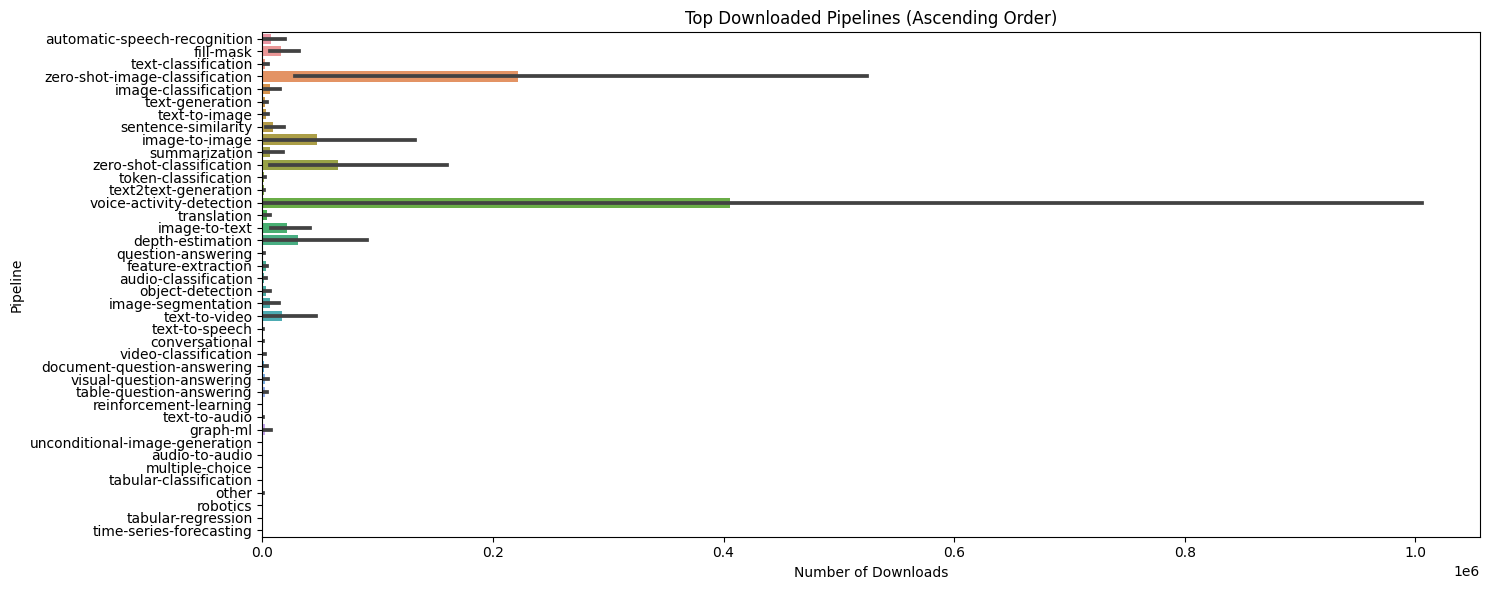

In [24]:
plt.figure(figsize=(15, 6))
sns.barplot(x='downloads', y='pipeline', data=df)
plt.xlabel('Number of Downloads')
plt.ylabel('Pipeline')
plt.title('Top Downloaded Pipelines (Ascending Order)')
plt.tight_layout()
plt.show()


In [25]:
# Data Types
print("\nData Types:")
print(df.dtypes)

# Missing Values
print("\nMissing Values:")
print(df.isnull().sum())



Data Types:
model_id        object
pipeline        object
downloads        int64
likes            int64
author_id       object
author_name     object
author_type     object
author_isPro      bool
lastModified    object
dtype: object

Missing Values:
model_id             0
pipeline        192288
downloads            0
likes                0
author_id           67
author_name         70
author_type         70
author_isPro         0
lastModified         0
dtype: int64


# Count of Likes and Downloads

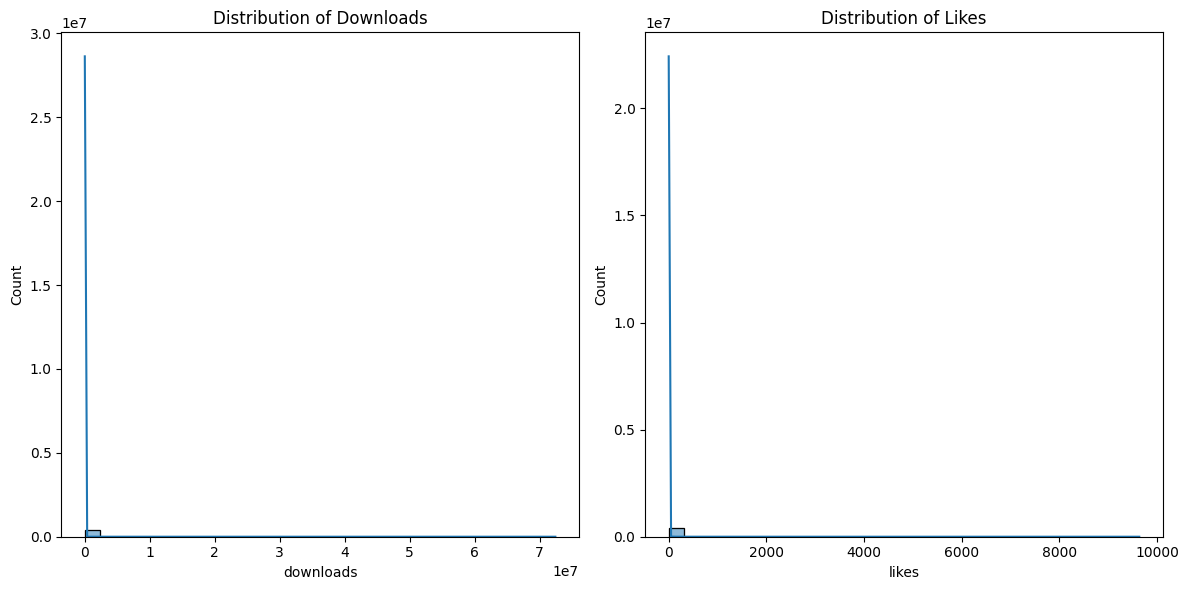

In [26]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['downloads'], bins=30, kde=True)
plt.title('Distribution of Downloads')

plt.subplot(1, 2, 2)
sns.histplot(df['likes'], bins=30, kde=True)
plt.title('Distribution of Likes')

plt.tight_layout()
plt.show()


> **Observaton : Likes are higher than Downloads**

# Pipeline Distribution of Models

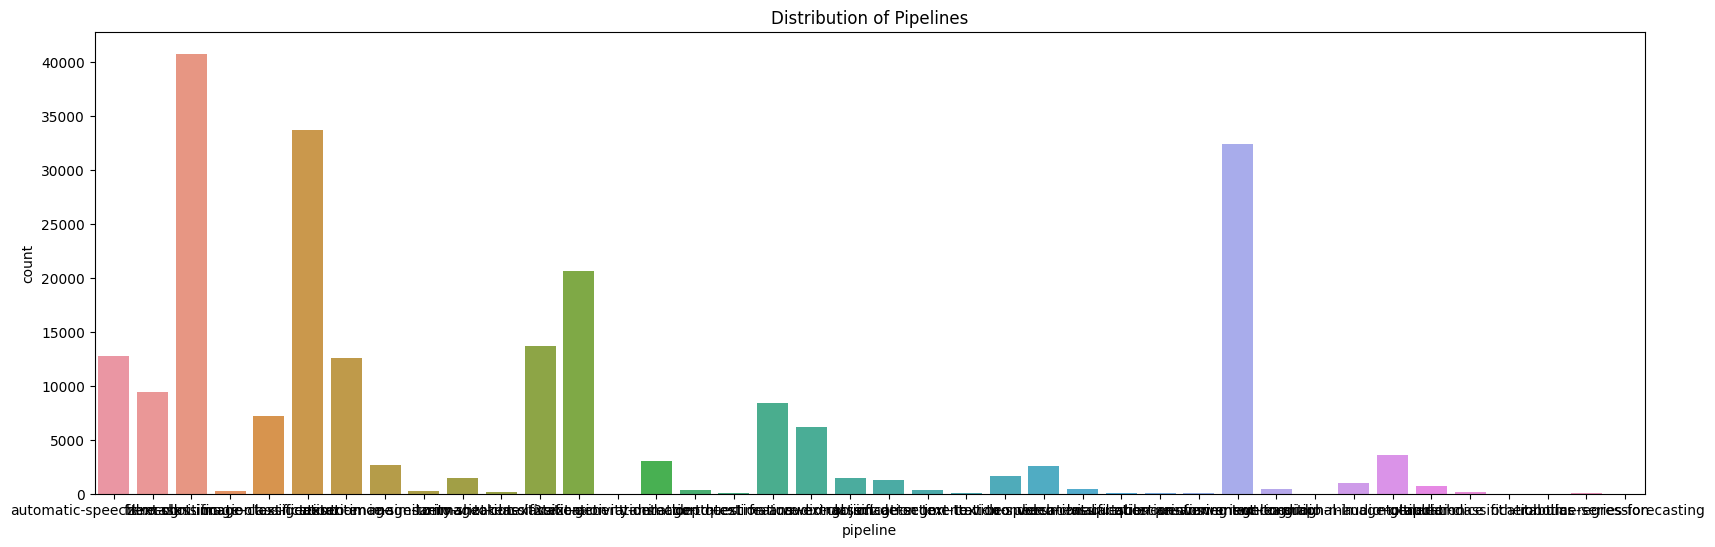

In [27]:

plt.figure(figsize=(20, 6))
sns.countplot(x='pipeline', data=df)
plt.title('Distribution of Pipelines')
plt.show()


# Author Types Distribution

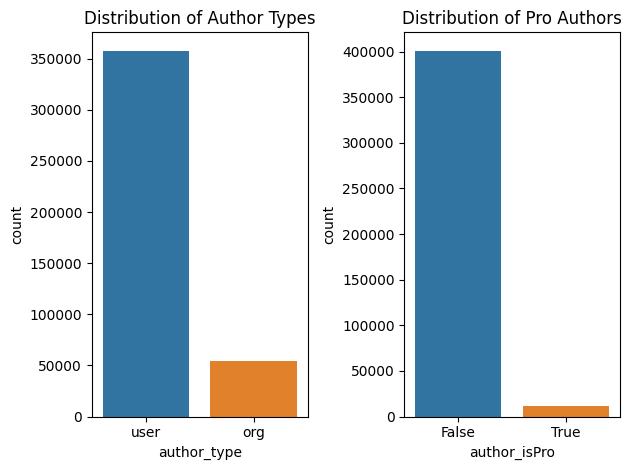

In [28]:

plt.subplot(1, 2, 1)
sns.countplot(x='author_type', data=df)
plt.title('Distribution of Author Types')

plt.subplot(1, 2, 2)
sns.countplot(x='author_isPro', data=df)
plt.title('Distribution of Pro Authors')

plt.tight_layout()
plt.show()


# Downloads Over The Recent Time

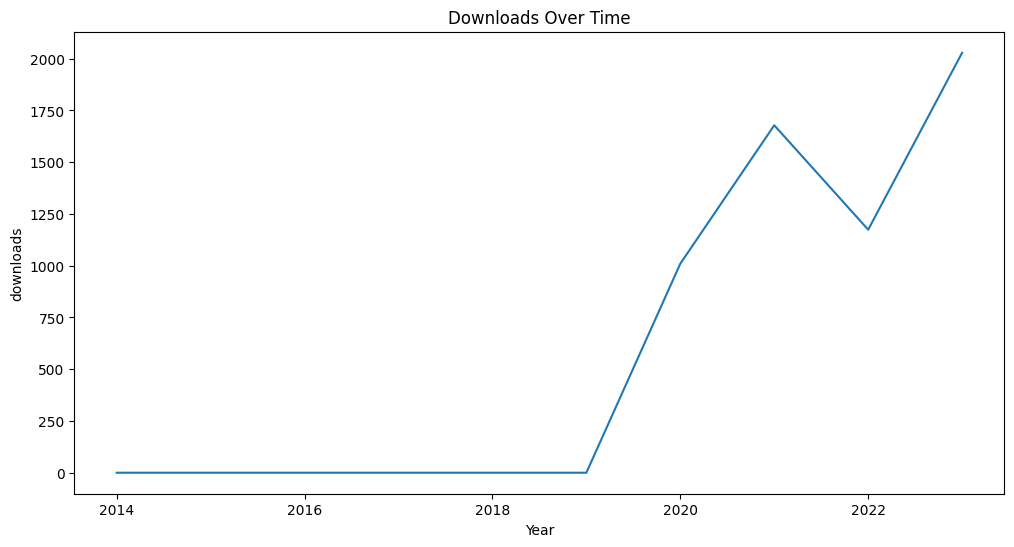

In [29]:
# Time Analysis
df['lastModified'] = pd.to_datetime(df['lastModified'])
df['Year'] = df['lastModified'].dt.year

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='downloads', data=df, ci=None)
plt.title('Downloads Over Time')
plt.show()


# MODEL ID --- DOWNLOADS

> # Number of Models By Author Type

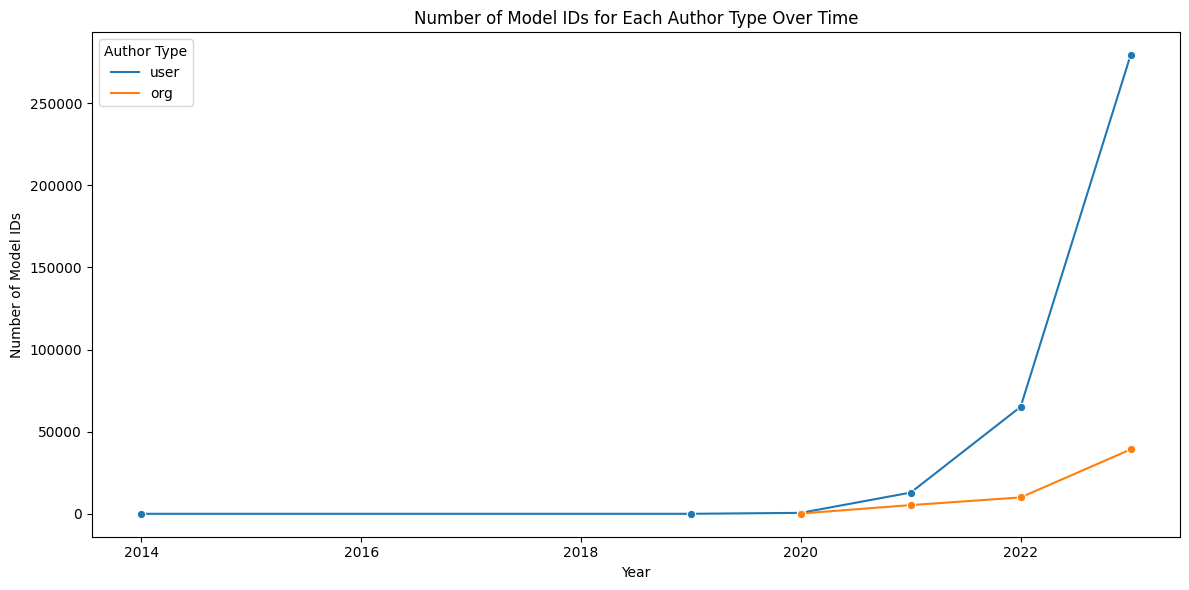

In [30]:
import seaborn as sns

df['lastModified'] = pd.to_datetime(df['lastModified'])
df['Year'] = df['lastModified'].dt.year

# Countintg the number of model_id for each author_type and year
author_type_counts = df.groupby(['Year', 'author_type'])['model_id'].nunique().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='model_id', hue='author_type', data=author_type_counts, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Model IDs')
plt.title('Number of Model IDs for Each Author Type Over Time')
plt.legend(title='Author Type', loc='upper left')
plt.tight_layout()
plt.show()


> # Number of Downloads By Author Type

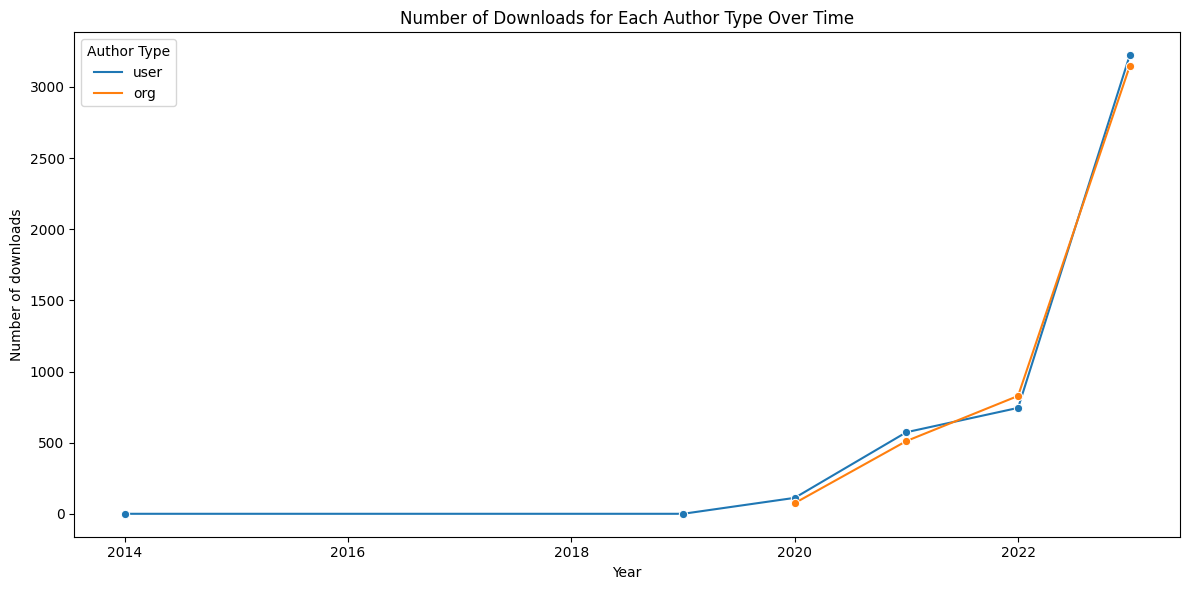

In [31]:

df['lastModified'] = pd.to_datetime(df['lastModified'])
df['Year'] = df['lastModified'].dt.year

author_type_counts = df.groupby(['Year', 'author_type'])['downloads'].nunique().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='downloads', hue='author_type', data=author_type_counts, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of downloads')
plt.title('Number of Downloads for Each Author Type Over Time')
plt.legend(title='Author Type', loc='upper left')
plt.tight_layout()
plt.show()


> **Numeric Models by Author Type**

In [32]:

model_counts_by_author = df.groupby('author_type')['model_id'].nunique().reset_index(name='model_count')

# Displaying the counts
print("Model Counts for Each Author Type:")
print(model_counts_by_author)

Model Counts for Each Author Type:
  author_type  model_count
0         org        54598
1        user       357839


> **Numeric Downloaded Models by Author Type**

In [33]:
# Group by 'author_type' and count unique 'model_id' occurrences
dl_counts_by_author = df.groupby('author_type')['downloads'].nunique().reset_index(name='download_count')

# Display the counts
print("downloads Counts for Each Author Type:")
print(dl_counts_by_author)

downloads Counts for Each Author Type:
  author_type  download_count
0         org            3728
1        user            3630


# Mean ratio Downloads

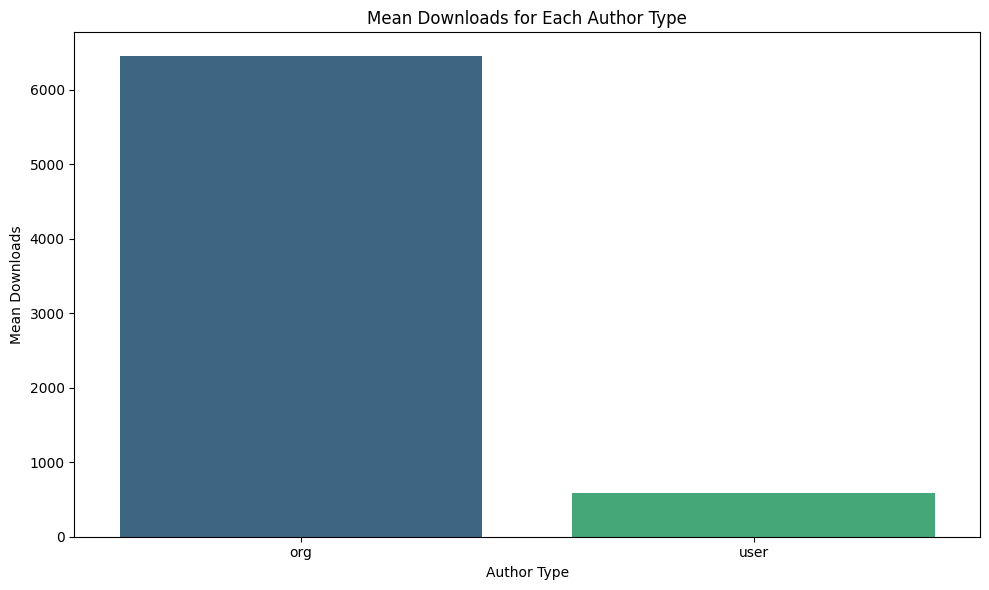

In [34]:

author_type_ratio = df.groupby('author_type')['downloads'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='author_type', y='downloads', data=author_type_ratio, palette='viridis')
plt.xlabel('Author Type')
plt.ylabel('Mean Downloads')
plt.title('Mean Downloads for Each Author Type')
plt.tight_layout()
plt.show()

# Number of Models by Author Type

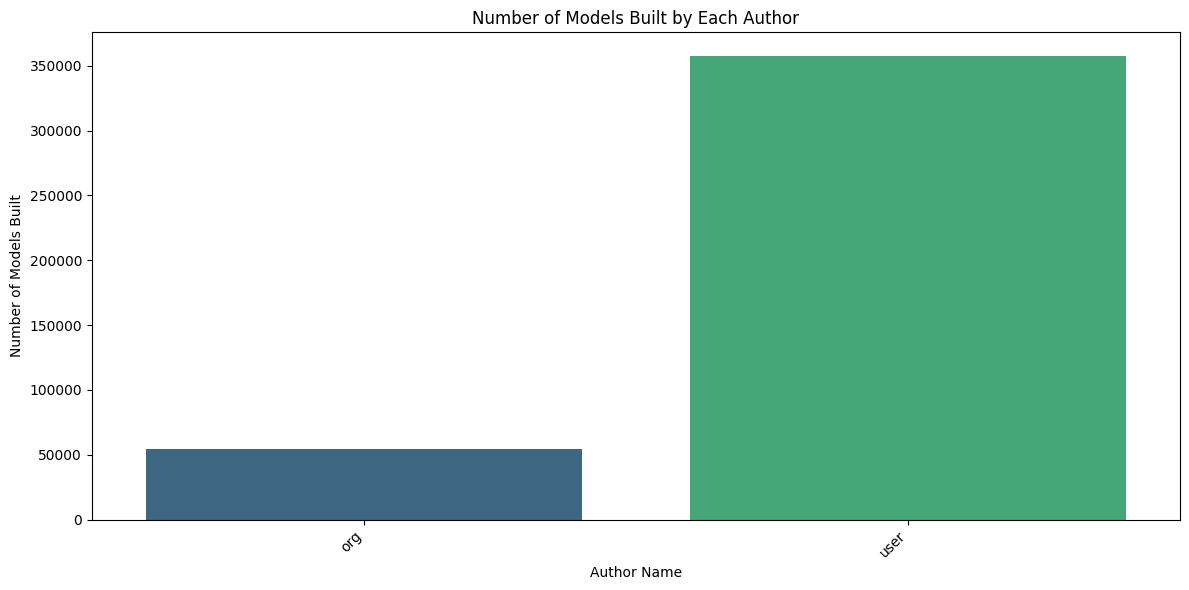

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


author_type_ratio = df.groupby('author_type')['model_id'].nunique().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='author_type', y='model_id', data=author_type_ratio, palette='viridis')
plt.xlabel("Author Name")
plt.ylabel("Number of Models Built")
plt.title("Number of Models Built by Each Author")
plt.xticks(rotation=45, ha="right")  
plt.tight_layout()
plt.show()


# All Time Top 10 Downloaded Models

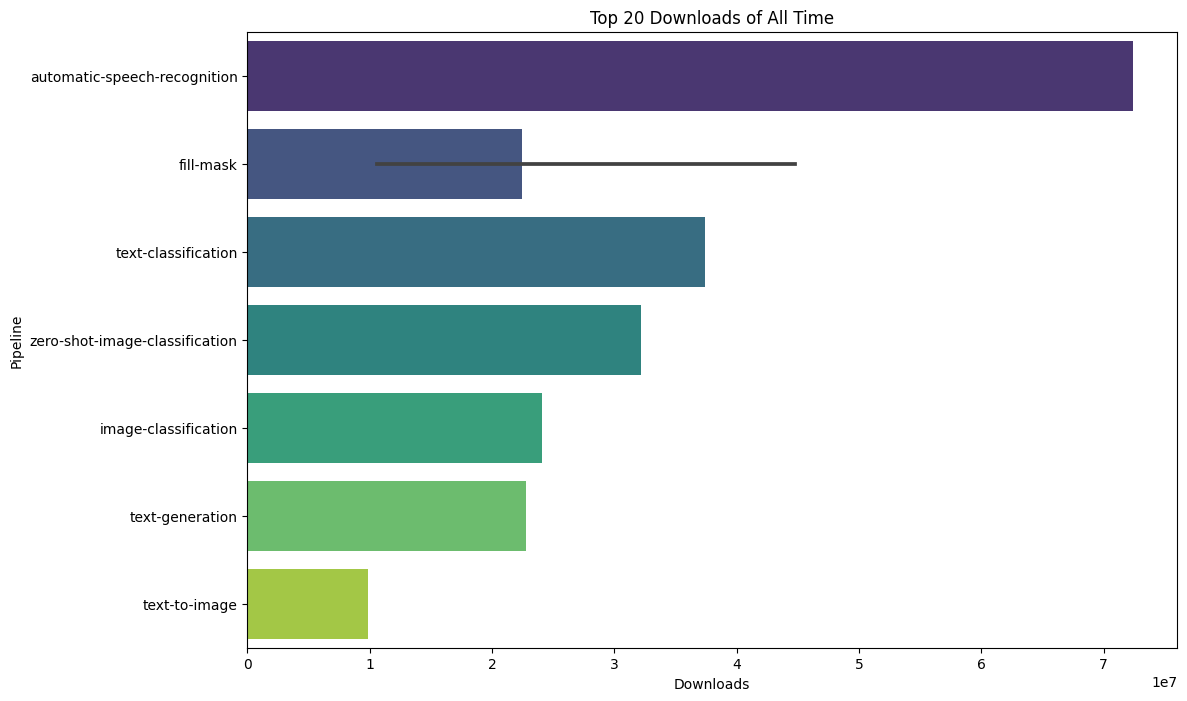

In [36]:

df['lastModified'] = pd.to_datetime(df['lastModified'])

# Top 20 downloads of all time

df_all_time = df[df['lastModified'] >= '2014-08-10']
top_20_all_time = df_all_time.nlargest(10, 'downloads')

plt.figure(figsize=(12, 8))
sns.barplot(x='downloads', y='pipeline', data=top_20_all_time, palette='viridis')
plt.title('Top 20 Downloads of All Time')
plt.xlabel('Downloads')
plt.ylabel('Pipeline')
plt.show()


# Recent Time Top 10 Downloaded Models

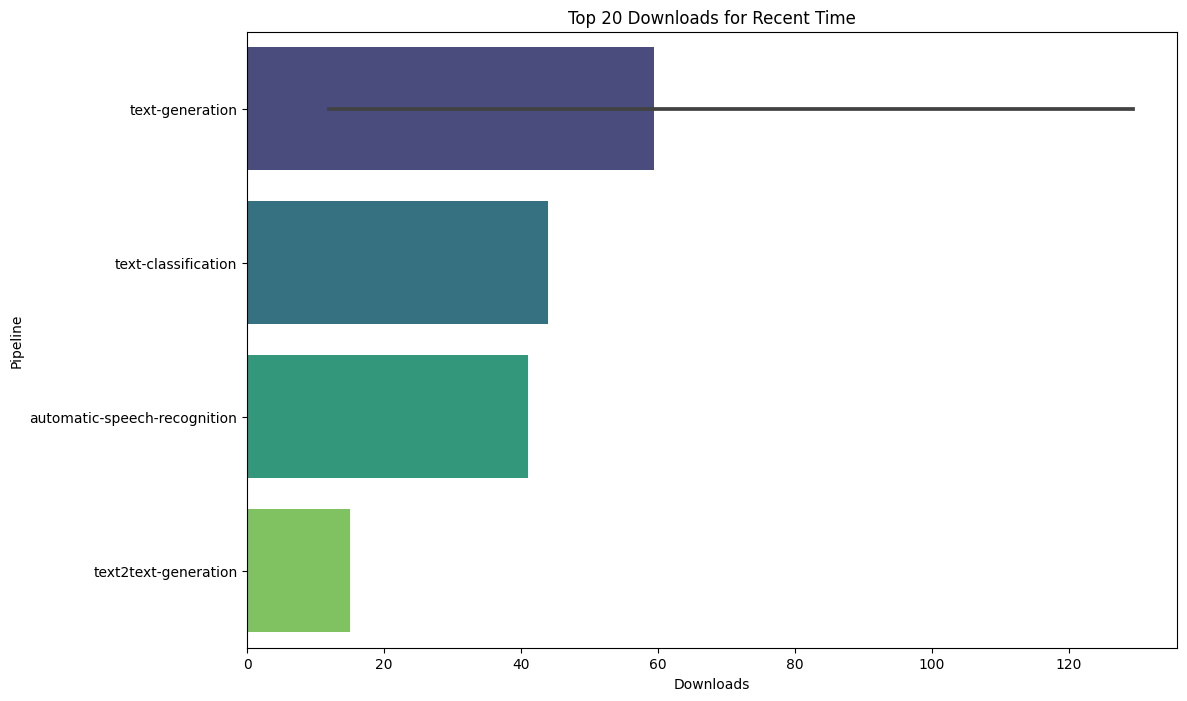

In [37]:

df['lastModified'] = pd.to_datetime(df['lastModified'])


df_recent_time = df[df['lastModified'] >= '2023-11-27']

# Top 20 downloads for recent time
top_20_recent_time = df_recent_time.nlargest(10, 'downloads')

plt.figure(figsize=(12, 8))
sns.barplot(x='downloads', y='pipeline', data=top_20_recent_time, palette='viridis')
plt.title('Top 20 Downloads for Recent Time')
plt.xlabel('Downloads')
plt.ylabel('Pipeline')
plt.show()


# Comparison of Both times Downloads

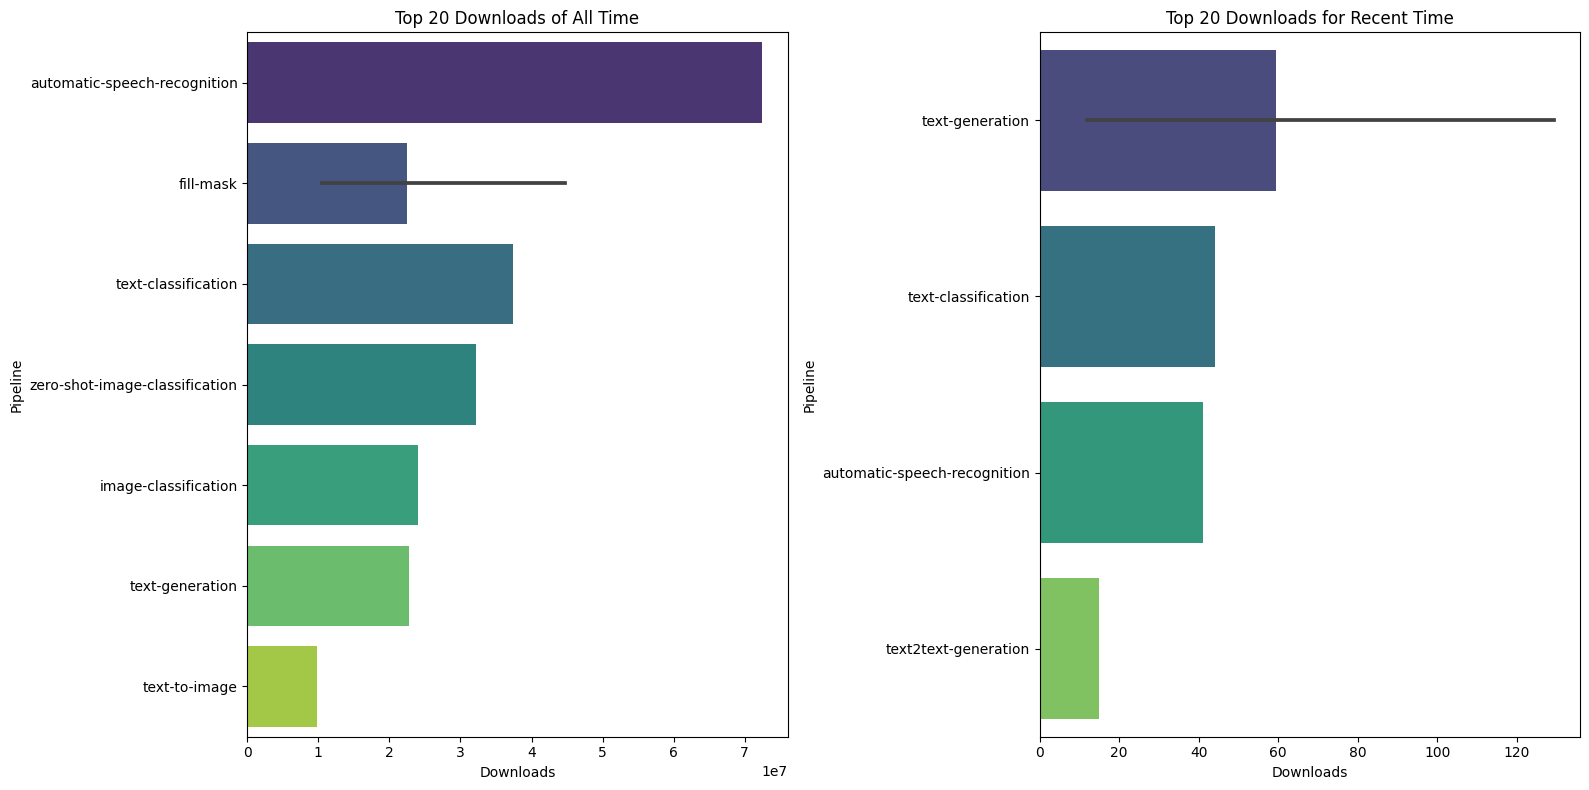

In [38]:

df['lastModified'] = pd.to_datetime(df['lastModified'])

df_all_time = df[df['lastModified'] >= '2014-08-10']

df_recent_time = df[df['lastModified'] >= '2023-11-27']

# Top 20 downloads 
top_20_all_time = df_all_time.nlargest(10, 'downloads')
top_20_recent_time = df_recent_time.nlargest(10, 'downloads')

plt.figure(figsize=(16, 8))

# Plot for all time
plt.subplot(1, 2, 1)
sns.barplot(x='downloads', y='pipeline', data=top_20_all_time, palette='viridis')
plt.title('Top 20 Downloads of All Time')
plt.xlabel('Downloads')
plt.ylabel('Pipeline')

# Plot for recent time
plt.subplot(1, 2, 2)
sns.barplot(x='downloads', y='pipeline', data=top_20_recent_time, palette='viridis')
plt.title('Top 20 Downloads for Recent Time')
plt.xlabel('Downloads')
plt.ylabel('Pipeline')

plt.tight_layout()
plt.show()


>**Observation: Text-Generation Models Download were increased in 2023**